In [14]:
import pandas as pd
from sklearn.neural_network import MLPClassifier 
from sklearn.preprocessing import Normalizer 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.metrics import recall_score, make_scorer, f1_score

#Carregando o DataSet e removendo a primeira coluna 
data= pd.read_csv("data.csv")
data = pd.DataFrame(data)
data = data.drop("id", axis='columns')
data

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,target
0,6.037742,18.243454,40.381390,9.784733,3.451509,4.194046,30.072374,3.476667,6.521961,6.605738,22.462237,68.671411,2.123557,4.556672,3.280207,0
1,4.864813,18.052841,28.834526,11.217766,2.443611,5.655477,41.134720,3.694615,5.626523,6.536719,12.144566,59.243116,3.237363,2.378608,6.277202,0
2,5.990206,13.298591,36.587566,9.008438,2.023970,6.461286,32.538523,2.947297,5.333709,4.815262,16.393260,56.160007,3.768556,2.549477,5.292898,0
3,6.026474,21.558925,24.664167,9.261698,2.814130,6.180293,33.154155,3.403718,4.414961,7.806231,9.716835,46.486271,2.134216,2.264123,5.567176,0
4,6.644875,25.254258,31.836788,6.095689,2.972857,5.901883,47.081506,2.149458,6.531795,9.144267,15.906459,68.774964,2.899033,2.402410,4.993752,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,5.648692,12.151903,33.616939,7.365216,3.193612,5.690936,37.681454,2.041982,6.170510,4.400060,18.368037,64.970902,2.393963,2.750069,4.265303,1
4196,5.234917,22.252772,34.026744,11.575644,3.845047,4.362713,35.228194,3.141254,6.162440,8.057464,17.143794,64.885928,2.265420,3.990728,4.966921,0
4197,5.373518,21.427144,30.300114,8.139834,0.375249,3.257935,26.803596,4.639369,8.558725,7.758514,18.106558,90.117027,2.081920,4.791632,3.620163,0
4198,8.365826,15.016489,44.254349,11.368578,4.242211,4.292858,31.827755,4.008945,3.493721,5.437292,12.841858,36.786293,2.775595,2.661320,3.082622,0


In [15]:
data = data.sort_values("target").iloc[-800:]
pd.DataFrame(data.iloc[:, 12:])

,col_12,col_13,col_14,target
3501,1.940201,3.593715,3.892735,0
3502,2.263092,3.978941,5.001907,0
3503,2.359612,2.847351,4.556371,0
3504,1.813626,2.781324,5.925271,0
3505,2.942607,3.378112,4.442734,0
...,...,...,...,...
3234,1.894105,2.599733,4.209581,1
2531,3.168759,2.533583,5.721238,1
3885,3.250885,2.605461,5.673382,1
3154,3.444297,3.533187,3.927719,1


In [16]:
data.corr()['col_4']

col_0     0.153708
col_1     0.157552
col_2     0.177753
col_3     0.046813
col_4     1.000000
col_5    -0.024610
col_6     0.075899
col_7     0.080079
col_8    -0.308620
col_9     0.157552
col_10    0.135509
col_11   -0.308620
col_12   -0.112937
col_13    0.030798
col_14   -0.151378
target   -0.045595
Name: col_4, dtype: float64

In [17]:
data["target"].value_counts()

target
0    484
1    316
Name: count, dtype: int64

In [18]:
X = data.iloc[:, 0 :15]
y = data.iloc[:, -1:]
print(X.iloc[:, -1:], y)


        col_14
3501  3.892735
3502  5.001907
3503  4.556371
3504  5.925271
3505  4.442734
...        ...
3234  4.209581
2531  5.721238
3885  5.673382
3154  3.927719
4195  4.265303

[800 rows x 1 columns]       target
3501       0
3502       0
3503       0
3504       0
3505       0
...      ...
3234       1
2531       1
3885       1
3154       1
4195       1

[800 rows x 1 columns]


In [19]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size= 0.2, random_state=1, shuffle=True)

In [20]:

grid = GridSearchCV(
             estimator=MLPClassifier(),
             param_grid={
                "hidden_layer_sizes" : [
                    (100),
                    (100, 100),
                    (100, 100, 100, 100),
                    (50, 50, 50, 50),
                ],
                "activation": ['relu', 'identity', 'logistic', 'tanh'],
                "learning_rate_init":[0.004, 0.01, 0.0001, 0.005],

             },
             cv=4,
             scoring={
                 "precision" : make_scorer(precision_score),
                 "recall" : make_scorer(recall_score),
                 "f1" : make_scorer(f1_score),
             },
             return_train_score=True,
             refit='f1',
            )

In [21]:
MLPClassifier().get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [22]:
grid.fit(Xtrain, Ytrain)

c:\Users\marin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\marin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\marin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\marin\AppData\Local\Programs\Python\Pyth

GridSearchCV(cv=4, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'identity', 'logistic', 'tanh'],
                         'hidden_layer_sizes': [100, (100, 100),
                                                (100, 100, 100, 100),
                                                (50, 50, 50, 50)],
                         'learning_rate_init': [0.004, 0.01, 0.0001, 0.005]},
             refit='f1', return_train_score=True,
             scoring={'f1': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [23]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_learning_rate_init,params,split0_test_precision,split1_test_precision,...,split3_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_train_f1,split1_train_f1,split2_train_f1,split3_train_f1,mean_train_f1,std_train_f1
0,0.073464,0.021180,0.007928,0.001624,relu,100,0.0040,"{'activation': 'relu', 'hidden_layer_sizes': 1...",0.666667,0.483871,...,0.425000,0.480086,0.070299,14,0.500000,0.659919,0.503597,0.465649,0.532291,0.075160
1,0.059016,0.023776,0.010188,0.003267,relu,100,0.0100,"{'activation': 'relu', 'hidden_layer_sizes': 1...",0.590909,0.529412,...,0.301370,0.375067,0.071612,42,0.594427,0.606897,0.350877,0.235849,0.447013,0.159002
2,0.152068,0.006139,0.006127,0.006587,relu,100,0.0001,"{'activation': 'relu', 'hidden_layer_sizes': 1...",0.542857,0.432432,...,0.407767,0.375132,0.031788,41,0.472973,0.408946,0.404332,0.424028,0.427570,0.027207
3,0.066427,0.020904,0.012181,0.007043,relu,100,0.0050,"{'activation': 'relu', 'hidden_layer_sizes': 1...",0.677419,0.600000,...,0.525424,0.447641,0.049714,29,0.501792,0.487085,0.494118,0.641026,0.531005,0.063733
4,0.295486,0.017854,0.007813,0.007813,relu,"(100, 100)",0.0040,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.478261,0.553191,...,0.488372,0.490958,0.051890,11,0.687500,0.708464,0.559387,0.569343,0.631173,0.067310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.421725,0.041778,0.007431,0.004345,tanh,"(100, 100, 100, 100)",0.0050,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.666667,0.619048,...,0.465116,0.380646,0.122910,40,0.372294,0.423529,0.636872,0.498141,0.482709,0.099622
60,0.230587,0.062279,0.009558,0.001133,tanh,"(50, 50, 50, 50)",0.0040,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.622642,0.465517,...,0.453608,0.506071,0.055124,7,0.757835,0.736842,0.744630,0.684746,0.731013,0.027746
61,0.132376,0.042632,0.008596,0.001140,tanh,"(50, 50, 50, 50)",0.0100,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.545455,0.600000,...,0.489796,0.351819,0.156523,48,0.532051,0.136585,0.546713,0.518771,0.433530,0.171726
62,0.396903,0.011033,0.009049,0.001505,tanh,"(50, 50, 50, 50)",0.0001,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.534884,0.533333,...,0.432990,0.433881,0.011838,33,0.609524,0.584615,0.476868,0.525253,0.549065,0.051717


In [25]:
results = grid.predict(Xtest)

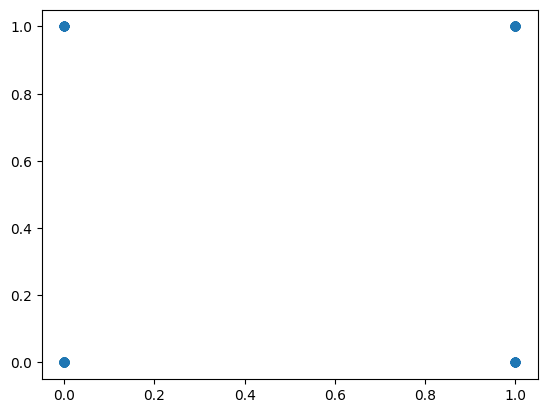

In [62]:
import matplotlib.pyplot as plt

plt.scatter(x=results, y=Ytest)

In [64]:
import numpy as np
comp_table = pd.DataFrame({'True Target': np.ravel(Ytest), 'Predicted Target': results})
comp_table['Squared_Error'] = (comp_table['True Target'] - comp_table['Predicted Target'])**2
MSE = int('0')
hits = int('0')
for x in comp_table.Squared_Error:
    MSE += x
    if x == 0:
        hits += 1
per = (hits/comp_table['Squared_Error'].size)*100
print(f"Mean Squared Error: {MSE}")
print(f"Percentage of hits: {per}%")

Mean Squared Error: 48
Percentage of hits: 70.0%


array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0])

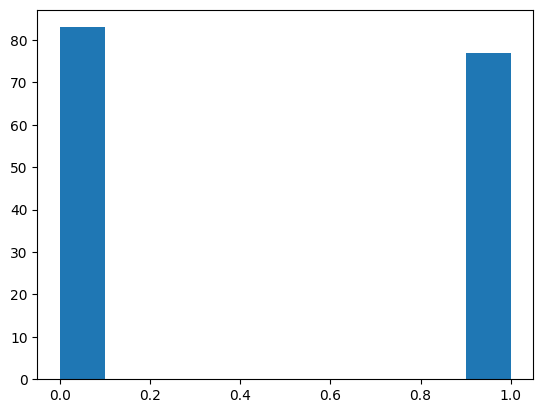

In [ ]:
plt.hist(results)
